<h2 style="text-align:center">Predict the employee attrition rate in organizations</h2>

### Problem Statement 
---
Employees are the most important part of an organization. Successful employees meet deadlines, make sales, and build the brand through positive customer interactions.

Employee attrition is a major cost to an organization and predicting such attritions is the most important requirement of the Human Resources department in many organizations. In this problem, your task is to predict the attrition rate of employees of an organization

---



#### Importing libraries

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error

#### Dataset directory path

In [126]:
dataset_dir='data'

#### Load test and train data

In [127]:
train_data=pd.read_csv(os.path.join(dataset_dir,'Train.csv'))
test_data=pd.read_csv(os.path.join(dataset_dir,'Test.csv'))

#### Print first 5 rows of train data

In [128]:
train_data.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


#### Print shape of train and test data

In [129]:
train_data.shape

(7000, 24)

In [130]:
test_data.shape

(3000, 23)

#### Check column names and their dtypes in train data

In [131]:
train_data.dtypes

Employee_ID                   object
Gender                        object
Age                          float64
Education_Level                int64
Relationship_Status           object
Hometown                      object
Unit                          object
Decision_skill_possess        object
Time_of_service              float64
Time_since_promotion           int64
growth_rate                    int64
Travel_Rate                    int64
Post_Level                     int64
Pay_Scale                    float64
Compensation_and_Benefits     object
Work_Life_balance            float64
VAR1                           int64
VAR2                         float64
VAR3                         float64
VAR4                         float64
VAR5                           int64
VAR6                           int64
VAR7                           int64
Attrition_rate               float64
dtype: object

#### Check null values in train and test data

In [132]:
train_data.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [133]:
test_data.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          161
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service               52
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      3
Compensation_and_Benefits      0
Work_Life_balance              5
VAR1                           0
VAR2                         217
VAR3                           0
VAR4                         298
VAR5                           0
VAR6                           0
VAR7                           0
dtype: int64

#### Handle missing values in train and test data
##### We will use imputation methods to handle null values in train and test data, but before that we need to see the distribution of features having null values

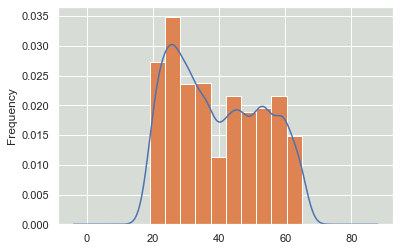

In [134]:
fig, ax = plt.subplots()
train_data['Age'].plot.kde(ax=ax, legend=False)
train_data['Age'].plot.hist(density=True, ax=ax)
ax.set_facecolor('#d8dcd6')

#### Histogram for Age doesn't follow any kind of normal, uniform or skewed distribution so we will use forward filling for imputing values

In [135]:
train_data['Age'].ffill(inplace=True)
test_data['Age'].ffill(inplace=True)

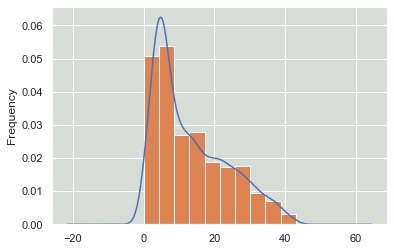

In [136]:
fig, ax = plt.subplots()
train_data['Time_of_service'].plot.kde(ax=ax, legend=False)
train_data['Time_of_service'].plot.hist(density=True, ax=ax)
ax.set_facecolor('#d8dcd6')

#### As graph for Time_of_service is skewed we will impute missing values with median

In [137]:
train_data['Time_of_service'].fillna(train_data['Time_of_service'].median(),inplace=True)
test_data['Time_of_service'].fillna(train_data['Time_of_service'].median(),inplace=True)

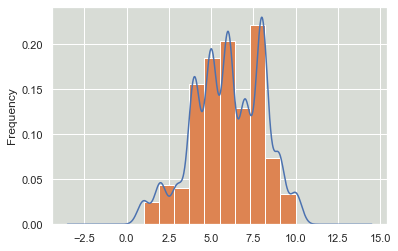

In [138]:
fig, ax = plt.subplots()
train_data['Pay_Scale'].plot.kde(ax=ax, legend=False)
train_data['Pay_Scale'].plot.hist(density=True, ax=ax)
ax.set_facecolor('#d8dcd6')

#### Histogram for Pay_Scale doesn't follow any kind of normal, uniform or skewed distribution so we will use forward filling for imputing values

In [139]:
train_data['Pay_Scale'].ffill(inplace=True)
test_data['Pay_Scale'].ffill(inplace=True)

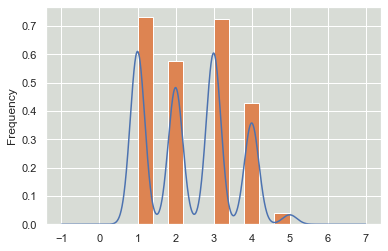

In [140]:
fig, ax = plt.subplots()
train_data['Work_Life_balance'].plot.kde(ax=ax, legend=False)
train_data['Work_Life_balance'].plot.hist(density=True, ax=ax)
ax.set_facecolor('#d8dcd6')

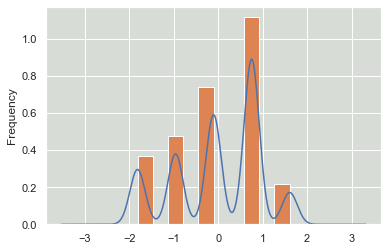

In [141]:
fig, ax = plt.subplots()
train_data['VAR2'].plot.kde(ax=ax, legend=False)
train_data['VAR2'].plot.hist(density=True, ax=ax)
ax.set_facecolor('#d8dcd6')

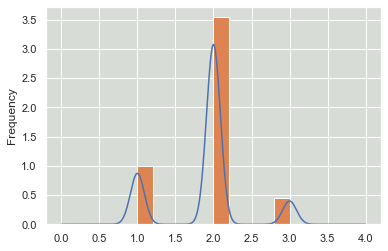

In [142]:
fig, ax = plt.subplots()
train_data['VAR4'].plot.kde(ax=ax, legend=False)
train_data['VAR4'].plot.hist(density=True, ax=ax)
ax.set_facecolor('#d8dcd6')

#### As you can see from above graphs, Work_Life_balance,VAR2,VAR4 are numerical columns but their values are discrete.Hence we can impute missing values with their mode.

In [143]:
train_data['Work_Life_balance'].fillna(train_data['Work_Life_balance'].mode()[0],inplace=True)
test_data['Work_Life_balance'].fillna(train_data['Work_Life_balance'].mode()[0],inplace=True)

In [144]:
train_data['VAR2'].fillna(train_data['VAR2'].mode()[0],inplace=True)
test_data['VAR2'].fillna(train_data['VAR2'].mode()[0],inplace=True)

In [145]:
train_data['VAR4'].fillna(train_data['VAR4'].mode()[0],inplace=True)
test_data['VAR4'].fillna(train_data['VAR4'].mode()[0],inplace=True)

In [146]:
train_data.isnull().sum()

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
Attrition_rate               0
dtype: int64

In [147]:
test_data.isnull().sum()

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
dtype: int64

In [148]:
train_data.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,2.0,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


#### Now we will handle categorical columns , select those columns which have object dtype only

In [149]:
categorical_data=train_data.select_dtypes(include=['object'])

In [150]:
categorical_data.head()

,Employee_ID,Gender,Relationship_Status,Hometown,Unit,Decision_skill_possess,Compensation_and_Benefits
0,EID_23371,F,Married,Franklin,IT,Conceptual,type2
1,EID_18000,M,Single,Springfield,Logistics,Analytical,type2
2,EID_3891,F,Married,Clinton,Quality,Conceptual,type2
3,EID_17492,F,Single,Lebanon,Human Resource Management,Behavioral,type2
4,EID_22534,F,Married,Springfield,Logistics,Conceptual,type3


#### Plot graphs to see frequency distribution of columns

In [151]:
def frequency_distribution(value_count):
    sns.set(style="darkgrid")
    sns.barplot(value_count.index, value_count.values, alpha=0.9)
    plt.show()

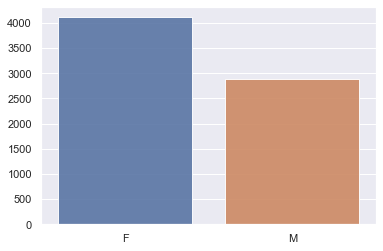

In [152]:
frequency_distribution(categorical_data['Gender'].value_counts())

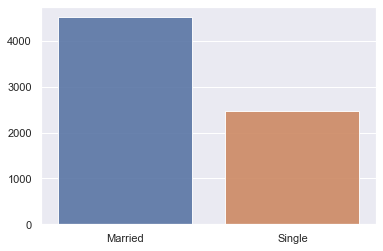

In [153]:
frequency_distribution(categorical_data['Relationship_Status'].value_counts())

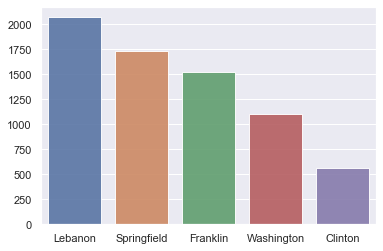

In [154]:
frequency_distribution(categorical_data['Hometown'].value_counts())

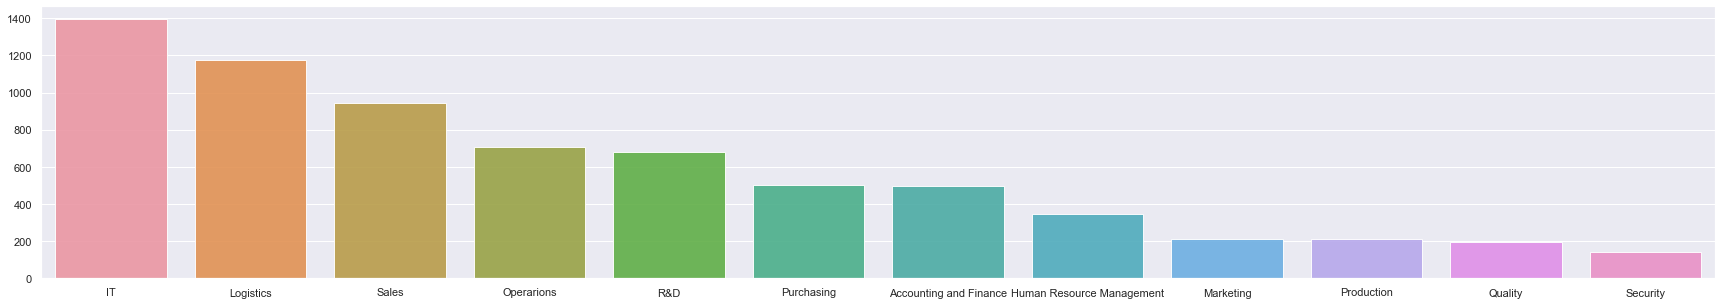

12


In [155]:
plt.figure(figsize=(30,5))
frequency_distribution(categorical_data['Unit'].value_counts())
print(categorical_data['Unit'].value_counts().count())

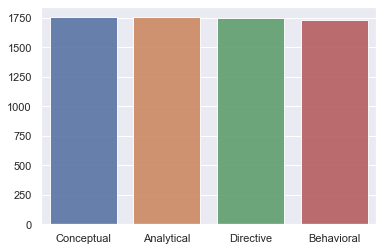

In [156]:
frequency_distribution(categorical_data['Decision_skill_possess'].value_counts())

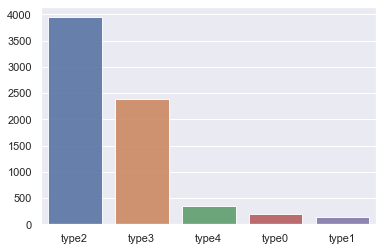

In [157]:
frequency_distribution(categorical_data['Compensation_and_Benefits'].value_counts())


#### As Gender and Relationshup_Status have only two categories, we will map them with 0 and 1.

In [158]:
train_data['Gender']=train_data['Gender'].apply(lambda x : 0 if x=='F' else 1)
test_data['Gender']=test_data['Gender'].apply(lambda x : 0 if x=='F' else 1)

In [159]:
train_data['Relationship_Status']=train_data['Relationship_Status'].apply(lambda x : 0 if x=='Married' else 1)
test_data['Relationship_Status']=test_data['Relationship_Status'].apply(lambda x : 0 if x=='Married' else 1)

In [160]:
train_data.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,0,42.0,4,0,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,1,24.0,3,1,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,0,58.0,3,0,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,0,26.0,3,1,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,2.0,3,7,3,0.0668
4,EID_22534,0,31.0,1,0,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


#### Hometown and Decision_skill_possess  are nominal variables with 5  and 4 different values respectively so we will use one hot encoding.

In [161]:
hometown_df_train = pd.get_dummies(train_data.Hometown)
hometown_df_test = pd.get_dummies(test_data.Hometown)

train_data = train_data.join(hometown_df_train)
test_data = test_data.join(hometown_df_test)

In [162]:
dskill_df_train = pd.get_dummies(train_data.Decision_skill_possess)
dskill_df_test = pd.get_dummies(test_data.Decision_skill_possess)

train_data = train_data.join(dskill_df_train)
test_data = test_data.join(dskill_df_test)

In [163]:
train_data.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Attrition_rate,Clinton,Franklin,Lebanon,Springfield,Washington,Analytical,Behavioral,Conceptual,Directive
0,EID_23371,0,42.0,4,0,Franklin,IT,Conceptual,4.0,4,...,0.1841,0,1,0,0,0,0,0,1,0
1,EID_18000,1,24.0,3,1,Springfield,Logistics,Analytical,5.0,4,...,0.0670,0,0,0,1,0,1,0,0,0
2,EID_3891,0,58.0,3,0,Clinton,Quality,Conceptual,27.0,3,...,0.0851,1,0,0,0,0,0,0,1,0
3,EID_17492,0,26.0,3,1,Lebanon,Human Resource Management,Behavioral,4.0,3,...,0.0668,0,0,1,0,0,0,1,0,0
4,EID_22534,0,31.0,1,0,Springfield,Logistics,Conceptual,5.0,4,...,0.1827,0,0,0,1,0,0,0,1,0


In [164]:
train_data.drop(['Hometown','Decision_skill_possess'],axis=1,inplace=True)
test_data.drop(['Hometown','Decision_skill_possess'],axis=1,inplace=True)

In [165]:
train_data.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Unit,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,...,Attrition_rate,Clinton,Franklin,Lebanon,Springfield,Washington,Analytical,Behavioral,Conceptual,Directive
0,EID_23371,0,42.0,4,0,IT,4.0,4,33,1,...,0.1841,0,1,0,0,0,0,0,1,0
1,EID_18000,1,24.0,3,1,Logistics,5.0,4,36,0,...,0.0670,0,0,0,1,0,1,0,0,0
2,EID_3891,0,58.0,3,0,Quality,27.0,3,51,0,...,0.0851,1,0,0,0,0,0,0,1,0
3,EID_17492,0,26.0,3,1,Human Resource Management,4.0,3,56,1,...,0.0668,0,0,1,0,0,0,1,0,0
4,EID_22534,0,31.0,1,0,Logistics,5.0,4,62,1,...,0.1827,0,0,0,1,0,0,0,1,0


In [166]:
test_data.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Unit,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,...,VAR7,Clinton,Franklin,Lebanon,Springfield,Washington,Analytical,Behavioral,Conceptual,Directive
0,EID_22713,0,32.0,5,1,R&D,7.0,4,30,1,...,4,0,0,0,1,0,0,0,1,0
1,EID_9658,1,65.0,2,1,IT,41.0,2,72,1,...,2,0,0,1,0,0,0,0,0,1
2,EID_22203,1,52.0,3,0,Sales,21.0,3,25,0,...,3,0,0,0,1,0,0,0,0,1
3,EID_7652,1,50.0,5,1,Marketing,11.0,4,28,1,...,3,0,0,0,0,1,1,0,0,0
4,EID_6516,0,44.0,3,0,R&D,12.0,4,47,1,...,4,0,1,0,0,0,0,0,1,0


#### Compensation_and_Benefits have some order so we will use label encdoing.

In [167]:
label_enc=LabelEncoder()
train_data['Compensation_and_Benefits']=label_enc.fit_transform(train_data['Compensation_and_Benefits'])

In [168]:
test_data['Compensation_and_Benefits']=label_enc.transform(test_data['Compensation_and_Benefits'])

#### Unit column has 12 different categories, we will use Binary Encoding

In [169]:
#!python3 -m pip install category_encoders

In [170]:
import category_encoders as ce
enc=ce.BinaryEncoder(cols=['Unit'])
enc_data=enc.fit_transform(train_data['Unit'])
train_data=pd.concat([train_data,enc_data],axis=1)

In [171]:
enc_data=enc.transform(test_data['Unit'])
test_data=pd.concat([test_data,enc_data],axis=1)

In [172]:
train_data.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Unit,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,...,Washington,Analytical,Behavioral,Conceptual,Directive,Unit_0,Unit_1,Unit_2,Unit_3,Unit_4
0,EID_23371,0,42.0,4,0,IT,4.0,4,33,1,...,0,0,0,1,0,0,0,0,0,1
1,EID_18000,1,24.0,3,1,Logistics,5.0,4,36,0,...,0,1,0,0,0,0,0,0,1,0
2,EID_3891,0,58.0,3,0,Quality,27.0,3,51,0,...,0,0,0,1,0,0,0,0,1,1
3,EID_17492,0,26.0,3,1,Human Resource Management,4.0,3,56,1,...,0,0,1,0,0,0,0,1,0,0
4,EID_22534,0,31.0,1,0,Logistics,5.0,4,62,1,...,0,0,0,1,0,0,0,0,1,0


In [173]:
test_data.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Unit,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,...,Washington,Analytical,Behavioral,Conceptual,Directive,Unit_0,Unit_1,Unit_2,Unit_3,Unit_4
0,EID_22713,0,32.0,5,1,R&D,7.0,4,30,1,...,0,0,0,1,0,0,1,0,1,1
1,EID_9658,1,65.0,2,1,IT,41.0,2,72,1,...,0,0,0,0,1,0,0,0,0,1
2,EID_22203,1,52.0,3,0,Sales,21.0,3,25,0,...,0,0,0,0,1,0,0,1,1,0
3,EID_7652,1,50.0,5,1,Marketing,11.0,4,28,1,...,1,1,0,0,0,0,1,0,1,0
4,EID_6516,0,44.0,3,0,R&D,12.0,4,47,1,...,0,0,0,1,0,0,1,0,1,1


#### As you can see Binary Encoder has made only 4 new columns out of 12 categories unlike One Hot Encoding which had made 12 new columns.

#### We can remove Unit from train and test data and we don't need Empolyee_ID also because each Employee_ID is unique and it won't be useful for the model.

In [174]:
train_data.drop(['Unit','Employee_ID'],axis=1,inplace=True)
test_data.drop(['Unit','Employee_ID'],axis=1,inplace=True)

In [175]:
train_data.shape

(7000, 34)

In [176]:
test_data.shape

(3000, 33)

#### Print description of data to check if data is on same scale or not.

In [177]:
train_data.describe()

,Gender,Age,Education_Level,Relationship_Status,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,...,Washington,Analytical,Behavioral,Conceptual,Directive,Unit_0,Unit_1,Unit_2,Unit_3,Unit_4
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,...,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.0,7000.000000,7000.000000,7000.000000,7000.000000
mean,0.412286,39.599286,3.187857,0.354286,13.315429,2.367143,47.064286,0.817857,2.798000,6.005714,...,0.158000,0.250714,0.248000,0.250857,0.250429,0.0,0.319714,0.306571,0.487429,0.496857
std,0.492281,13.611184,1.065102,0.478330,10.268266,1.149395,15.761406,0.648205,1.163721,2.058849,...,0.364767,0.433455,0.431883,0.433537,0.433291,0.0,0.466399,0.461103,0.499878,0.500026
min,0.000000,19.000000,1.000000,0.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,27.000000,3.000000,0.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.000000,37.000000,3.000000,0.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,1.000000,52.000000,4.000000,1.000000,20.000000,3.000000,61.000000,1.000000,3.000000,8.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000
max,1.000000,65.000000,5.000000,1.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


#### As you can see data is not on same scale so we will first scale the data using StandardScaler.
#### There is no need to scale target column so we will first drop it from train_data 

In [178]:
scaler=StandardScaler()
train_data_labels=train_data['Attrition_rate']
train_data=train_data.drop(['Attrition_rate'],axis=1)

In [179]:
train_df= scaler.fit_transform(train_data)
test_df = scaler.transform(test_data)

In [180]:
train_df = pd.DataFrame(train_df,columns=train_data.columns,index=train_data.index)
test_df = pd.DataFrame(test_df,columns=test_data.columns,index=test_data.index)

In [181]:
train_df.head()

,Gender,Age,Education_Level,Relationship_Status,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,...,Washington,Analytical,Behavioral,Conceptual,Directive,Unit_0,Unit_1,Unit_2,Unit_3,Unit_4
0,-0.837560,0.176391,0.762557,-0.740724,-0.907270,1.420724,-0.892388,0.281016,-1.545154,0.482967,...,-0.433184,-0.578450,-0.574271,1.728101,-0.57801,0.0,-0.685544,-0.664913,-0.975165,1.006306
1,1.193944,-1.146146,-0.176387,1.350030,-0.809876,1.420724,-0.702036,-1.261816,0.173594,-0.002776,...,-0.433184,1.728758,-0.574271,-0.578670,-0.57801,0.0,-0.685544,-0.664913,1.025467,-0.993734
2,-0.837560,1.351979,-0.176387,-0.740724,1.332800,0.550639,0.249724,-1.261816,-0.685780,0.968710,...,-0.433184,-0.578450,-0.574271,1.728101,-0.57801,0.0,-0.685544,-0.664913,1.025467,1.006306
3,-0.837560,-0.999197,-0.176387,1.350030,-0.907270,0.550639,0.566977,0.281016,0.173594,0.968710,...,-0.433184,-0.578450,1.741338,-0.578670,-0.57801,0.0,-0.685544,1.503956,-0.975165,-0.993734
4,-0.837560,-0.631826,-2.054275,-0.740724,-0.809876,1.420724,0.947681,0.281016,0.173594,-1.945748,...,-0.433184,-0.578450,-0.574271,1.728101,-0.57801,0.0,-0.685544,-0.664913,1.025467,-0.993734


---

### Machine Learning 

---

#### Let's make a baisc Linear Regression model to see how it performs.

In [56]:
train_X,test_X,train_y,test_y=train_test_split(train_df,train_data_labels,test_size=0.1)

In [57]:
lr=LinearRegression()

In [58]:
lr.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
predicted_test_X=lr.predict(test_X)

In [60]:
mean_squared_error(test_y,predicted_test_X)

0.03475427557293708

In [61]:
np.mean(cross_val_score(lr,train_df,train_data_labels,scoring='neg_mean_squared_error',cv=10))

-0.03460505458220924

##### Ist submission

In [62]:
predictions=lr.predict(test_df)

In [63]:
Employee_ID=pd.read_csv(os.path.join(dataset_dir,'Test.csv'))['Employee_ID']

In [64]:
submissions=pd.DataFrame({'Employee_ID':Employee_ID,'Attrition_rate':predictions})

In [65]:
submissions.to_csv('submission_1.csv',index=False) ##score 81.16

#### Now lets try Xgboost Model

In [66]:
#!python3 -m pip install xgboost

In [96]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [97]:
# params = {'learning_rate':0.01,'n_estimators': 1000,
#           'max_depth': 4,
#           'min_samples_split': 5,
#           'loss': 'huber'}

In [102]:
xgbReg = GradientBoostingRegressor()

In [103]:
hyperTunedXGB = GridSearchCV(estimator=xgbReg,
             param_grid={'learning_rate': [0.1, 0.3,0.5], 'loss': ('ls', 'huber'),'max_leaf_nodes':(500,100)})

In [104]:
hyperTunedXGB.fit(train_X,train_y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
           

In [105]:
predicted_test_X=hyperTunedXGB.predict(test_X)

In [106]:
mean_squared_error(test_y,predicted_test_X)

0.03508499546535751

#### 2nd submission

In [107]:
predictions=lr.predict(test_df)

In [108]:
Employee_ID=pd.read_csv(os.path.join(dataset_dir,'Test.csv'))['Employee_ID']

In [109]:
submissions=pd.DataFrame({'Employee_ID':Employee_ID,'Attrition_rate':predictions})

In [110]:
submissions.to_csv('submission_6_samar.csv',index=False) ##score 81.18674

#### As both of the models are giving about same score, let's try to build a model by selecting 10 best features using f_regression score.

In [111]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [112]:
bestfeatures = SelectKBest(score_func=f_regression, k=10)

In [113]:
fit=bestfeatures.fit(train_df,train_data_labels)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [114]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(train_X.columns)

In [115]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

In [116]:
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                        Specs     Score
0                      Gender  5.706395
25                 Behavioral  5.305665
10  Compensation_and_Benefits  4.438039
13                       VAR2  3.831375
11          Work_Life_balance  3.080226
1                         Age  2.488925
29                     Unit_1  2.316298
4             Time_of_service  2.071546
26                 Conceptual  1.921547
8                  Post_Level  1.883242


#### Use only these features to build the model.

In [117]:
imp_features=featureScores['Specs']

In [118]:
train_df1=train_X[imp_features]
test_df1=test_X[imp_features]

In [119]:
xgbRegressor1=xgb.XGBRegressor()

XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/opt/anaconda3/lib/python3.7/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /opt/anaconda3/lib/python3.7/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


In [120]:
xgbRegressor1.fit(train_df1,train_y)

NameError: name 'xgbRegressor1' is not defined

In [121]:
predicted_test_X=xgbRegressor1.predict(test_df1)

NameError: name 'xgbRegressor1' is not defined

In [ ]:
mean_squared_error(test_y,predicted_test_X)

#### 3rd submission

In [ ]:
test_df1=test_df[imp_features]

In [ ]:
predictions=xgbRegressor1.predict(test_df1)

In [ ]:
Employee_ID=pd.read_csv(os.path.join(dataset_dir,'Test.csv'))['Employee_ID']

In [ ]:
submissions=pd.DataFrame({'Employee_ID':Employee_ID,'Attrition_rate':predictions})

In [ ]:
submissions.to_csv('submission_3.csv',index=False) ##score 81.00 

#### So this method of feature selection didn't work out, I have tried with best 10,15,20 best features.

##### Let's print feature importances.

In [ ]:
feat_importances = pd.Series(xgbRegressor.feature_importances_, index=train_X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
imp_features=['VAR1','Lebanon','Compensation_and_Benefits','Education_Level','Clinton','Franklin','Conceptual',
             'Pay_Scale','VAR4','Travel_Rate','Age','VAR5','VAR7','VAR6','growth_rate',
             'Unit_2','Time_of_service','Directive','Work_Life_balance','Relationship_Status']

In [ ]:
train_df1=train_X[imp_features]
test_df1=test_X[imp_features]

In [ ]:
xgbRegressor2=xgb.XGBRegressor()

In [ ]:
xgbRegressor2.fit(train_df1,train_y)

In [ ]:
predicted_test_X=xgbRegressor2.predict(test_df1)

In [ ]:
mean_squared_error(test_y,predicted_test_X)

#### Submission 4

In [ ]:
test=test_df[imp_features]

In [ ]:
predictions=xgbRegressor2.predict(test)

In [ ]:
Employee_ID=pd.read_csv(os.path.join(dataset_dir,'Test.csv'))['Employee_ID']

In [ ]:
submissions=pd.DataFrame({'Employee_ID':Employee_ID,'Attrition_rate':predictions})

In [ ]:
submissions.to_csv('submission_4.csv',index=False) ##score 81.14

#### Let's make Heatmap

In [ ]:
corrmat = train_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(40,20))
#plot heat map
g=sns.heatmap(train_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")